# WeatherPy
----

#### Conclusions
* Temperature shows decrease in magnitude north and south of the equator with highest temperature observed around the equator. 
* Lower temperatures observed in the North side (Northern part of the globe + latitude) compare to the southern part of the globe – e.g. North part spans from 35deg to -20deg (most northern locations) . while the south part goes from about 35deg to 0 deg at the most southern locations 
* The clouds readings seem artificial with many locations have exactly same readings • Wind seems faster in the Northern part
* Contour maps may help understand the behavior of weather in 2D sense

In [1]:
# Dependencies and Setup
import bokeh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import os 
import requests as req
import json
import seaborn
import random
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = os.path.join("output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set the base url
base_url = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"

# define empty lists to hold the values
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lng = []
cities_list = []
country_code = []
city_counter = 1
set_counter = 1


print('Beginning Data Retrieval')
print('-----------------------------')

# loop in the cities list and get the information for each city in cities list from json file
for city in cities:
    print('Processing record '+str(city_counter)+' of set'+ str(set_counter)+"|"+city)
    city_counter +=1
    # define the params to call the correct url for each city
    try:
        params = {
            'appid': weather_api_key,
            'units': units,
            'q': city
        }
                     
        # Getting Data for city_counter
        
        response = requests.get(base_url, params=params).json()
       
        # extract the lat,lan,tem,humidity,loudines,wind_speed,date,country code and city name of each entity
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response["dt"])
        country_code.append(response['sys']['country'])
        cities_list.append(city)
    except KeyError:
        print("City not found. Skipping...")
        continue
    
    # set the counter for counting the sets
    if city_counter >= 50:
        time.sleep(10)
        city_counter = 0
        set_counter += 1
        
print('-----------------------------')
print('Data Retrieval Complete') 
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing record 1 of set1|uzhur
Processing record 2 of set1|kodiak
Processing record 3 of set1|fortuna
Processing record 4 of set1|new norfolk
Processing record 5 of set1|punta arenas
Processing record 6 of set1|ushuaia
Processing record 7 of set1|atuona
Processing record 8 of set1|faanui
Processing record 9 of set1|vaini
Processing record 10 of set1|hervey bay
Processing record 11 of set1|ostrovnoy
Processing record 12 of set1|rikitea
Processing record 13 of set1|rawson
Processing record 14 of set1|arraial do cabo
Processing record 15 of set1|kapaa
Processing record 16 of set1|uvarovka
Processing record 17 of set1|karaul
City not found. Skipping...
Processing record 18 of set1|anadyr
Processing record 19 of set1|mount gambier
Processing record 20 of set1|hasaki
Processing record 21 of set1|puerto escondido
Processing record 22 of set1|castro
Processing record 23 of set1|bredasdorp
Processing record 24 of set1|carnarvon
Processin

Processing record 5 of set5|presidencia roque saenz pena
Processing record 6 of set5|lerwick
Processing record 7 of set5|acari
Processing record 8 of set5|souillac
Processing record 9 of set5|hambantota
Processing record 10 of set5|peterhead
Processing record 11 of set5|butaritari
Processing record 12 of set5|fort nelson
Processing record 13 of set5|esperance
Processing record 14 of set5|denpasar
Processing record 15 of set5|machakos
Processing record 16 of set5|aklavik
Processing record 17 of set5|cedar city
Processing record 18 of set5|yulara
Processing record 19 of set5|maragogi
Processing record 20 of set5|cockburn town
Processing record 21 of set5|khandyga
Processing record 22 of set5|fevralsk
City not found. Skipping...
Processing record 23 of set5|stromness
Processing record 24 of set5|ust-nera
Processing record 25 of set5|coihaique
Processing record 26 of set5|north bend
Processing record 27 of set5|panubigan
Processing record 28 of set5|sayat
Processing record 29 of set5|kidal

Processing record 12 of set9|willowmore
Processing record 13 of set9|progreso
Processing record 14 of set9|arvika
Processing record 15 of set9|raigarh
Processing record 16 of set9|samusu
City not found. Skipping...
Processing record 17 of set9|attawapiskat
City not found. Skipping...
Processing record 18 of set9|beaupre
Processing record 19 of set9|pisco
Processing record 20 of set9|kamenskoye
City not found. Skipping...
Processing record 21 of set9|tabukiniberu
City not found. Skipping...
Processing record 22 of set9|phan thiet
Processing record 23 of set9|alikovo
Processing record 24 of set9|takoradi
Processing record 25 of set9|tura
Processing record 26 of set9|menongue
Processing record 27 of set9|bilma
Processing record 28 of set9|puerto leguizamo
Processing record 29 of set9|nyurba
Processing record 30 of set9|solton
Processing record 31 of set9|dukat
Processing record 32 of set9|carauari
Processing record 33 of set9|paratinga
Processing record 34 of set9|aksu
Processing record 3

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# display the lenght of each lists that we created
print(f'''
cities_list    {len(cities_list)}
temp           {len(temp)}
humidity       {len(humidity)}
cloudiness     {len(cloudiness)}
lat            {len(lat)}
date           {len(date)}
wind_speed     {len(wind_speed)}
country_code   {len(country_code)}

''')


cities_list    559
temp           559
humidity       559
cloudiness     559
lat            559
date           559
wind_speed     559
country_code   559




In [20]:
# create a data frame with the lists that er created in last part
weather_df = pd.DataFrame(columns = ['City Name','Country','Date','Latitude','Langitude','Temperature (F)','Humidity (%)','Cloudiness (%)','Wind Speed (MPH)'])
weather_df["Latitude"]=lat
weather_df["Langitude"]= lng
weather_df["Temperature (F)"]=temp
weather_df["Humidity (%)"]=humidity
weather_df["Cloudiness (%)"]=cloudiness
weather_df["Wind Speed (MPH)"]=wind_speed
weather_df["Date"]=date
weather_df["Country"]=country_code
weather_df["City Name"] =cities_list
weather_df["Date"] = [datetime.datetime.utcfromtimestamp(date) for date in weather_df["Date"]]
# Export the city data into a .csv
output_file = os.path.join("output_data","cities.csv")
weather_df.to_csv(output_file)
# Display the DataFrame
weather_df

,City Name,Country,Date,Latitude,Langitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,uzhur,RU,2020-04-11 22:23:29,55.30,89.83,32.16,75,0,3.04
1,kodiak,US,2020-04-11 22:23:29,57.79,-152.41,41.00,75,90,18.34
2,fortuna,US,2020-04-11 22:21:23,40.60,-124.16,55.44,87,75,12.75
3,new norfolk,AU,2020-04-11 22:23:30,-42.78,147.06,50.58,58,40,12.75
4,punta arenas,CL,2020-04-11 22:23:30,-53.15,-70.92,46.20,65,65,5.82
...,...,...,...,...,...,...,...,...,...
554,zemio,CF,2020-04-11 22:25:45,5.03,25.14,71.58,80,100,0.98
555,marfino,RU,2020-04-11 22:25:45,55.70,37.38,29.17,79,1,8.95
556,semey,KZ,2020-04-11 22:25:45,50.41,80.23,38.30,68,58,4.81
557,wladyslawowo,PL,2020-04-11 22:25:45,54.79,18.40,46.69,39,100,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

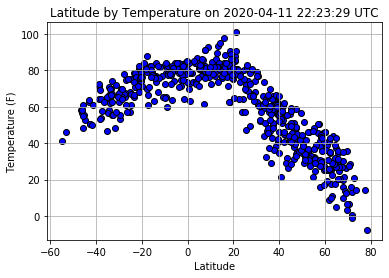

In [21]:
# extract some columns in data frame into lists variables
Latitude_city = weather_df["Latitude"]
tempeture_city = weather_df["Temperature (F)"]
date_city = weather_df["Date"]

# create a scatter plot with latitude vs. temperature
plt.scatter(Latitude_city,tempeture_city,edgecolors="black",facecolors="blue")
# set the labels and title
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude by Temperature on {date_city[0]} UTC")
# adjusting the grid of plot
plt.grid()
# save the plot in output file
plt.savefig("output_data/Fig1.png")
# display the plot
plt.show()

#### Latitude vs. Humidity Plot

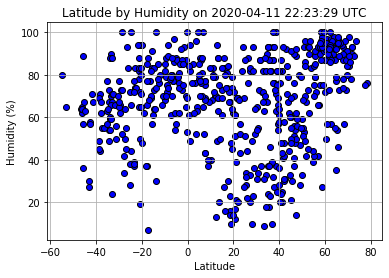

In [22]:
# extract some columns in data frame into lists variables
humidity_city =weather_df["Humidity (%)"]
# create a scatter plot with Latitude vs. Humidity
plt.scatter(Latitude_city,humidity_city,edgecolors="black",facecolors="blue")
# set the labels and title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude by Humidity on {date_city[0]} UTC")
# adjusting the grid of plot
plt.grid()
# save the plot in output file
plt.savefig("output_data/Fig2.png")
# display the plot
plt.show()

#### Latitude vs. Cloudiness Plot

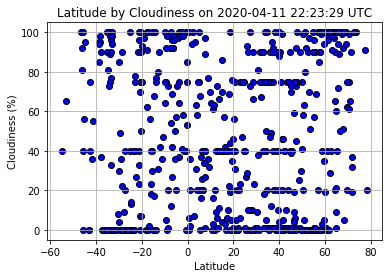

In [23]:
# extract some columns in data frame into lists variables
cloudiness_city = weather_df["Cloudiness (%)"]
# create a scatter plot with Latitude vs. Cloudiness
plt.scatter(Latitude_city,cloudiness_city,edgecolors="black",facecolors="blue")
# set the labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude by Cloudiness on {date_city[0]} UTC")
# adjusting the grid of plot
plt.grid()
# save the plot in output file
plt.savefig("output_data/Fig3.png")
# display the plot
plt.show()

#### Latitude vs. Wind Speed Plot

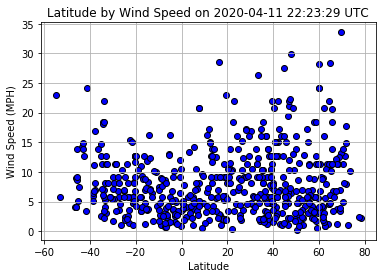

In [24]:
# extract some columns in data frame into lists variables
windspeed_city =  weather_df["Wind Speed (MPH)"]
# create a scatter plot with Latitude vs. Cloudiness
plt.scatter(Latitude_city,windspeed_city,edgecolors="black",facecolors="blue")
# set the labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Latitude by Wind Speed on {date_city[0]} UTC")
# set the grid of plot
plt.grid()
# save the plot in output file
plt.savefig("output_data/Fig4.png")
# display the plot
plt.show()

## Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots

# definition the new function
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate):
    # use linresress function and extract slope, intercept,rvalue,pvalue,stderr
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    # calculate the formula
    regress_values = x_values * slope + intercept
    # write the formula as text to put as annotate
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    # create a scatter plot
    plt.scatter(x_values,y_values)
    # create a liner plot with regress value
    plt.plot(x_values,regress_values,"r-")
    # create the annotate in plot and set the location of that
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    # set the labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # set the limitation of x and y
    plt.xlim(min(x_values)-5,max(x_values)+5)
    plt.ylim(min(y_values)-5,max(y_values)+5)
    # release the northern or southern with annotate location
    if x_annotate >= 0:
        hemisphere_name = "Northern"
    else:
        hemisphere_name = "Southern"
        
    # set the title of plot
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere_name} Hemisphere')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.show()

In [27]:
#plt.annotate?


In [28]:
# Create Northern and Southern Hemisphere DataFrames
Northern = weather_df.loc[weather_df["Latitude"]>=0,:]
Southern = weather_df.loc[weather_df["Latitude"]<0,:]

#Creating series for variables in the northern hemisphere
Northern_lat = Northern["Latitude"]
Northern_temp = Northern["Temperature (F)"]
Northern_hum = Northern["Humidity (%)"]
Northern_cloud = Northern["Cloudiness (%)"]
Northern_wind = Northern["Wind Speed (MPH)"]

#Creating series for variables in the southern hemisphere
Southern_lat = Southern["Latitude"]
Southern_temp = Southern["Temperature (F)"]
Southern_hum = Southern["Humidity (%)"]
Southern_cloud = Southern["Cloudiness (%)"]
Southern_wind = Southern["Wind Speed (MPH)"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.82
y = -1.03x + 92.74


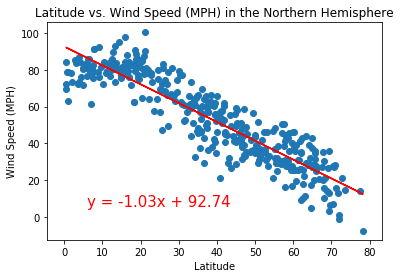

In [46]:
# call the linearregression function for Northern_lat,Northern_temp
linearregression(Northern_lat,Northern_temp,"Latitude","Wind Speed (MPH)",6,6)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.57
y = 0.56x + 82.82


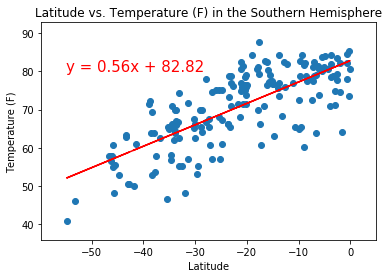

In [45]:
# call the linearregression function for Southern_lat,Southern_temp
linearregression(Southern_lat,Southern_temp,"Latitude", "Temperature (F)",-55,80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06
y = 0.3x + 55.13


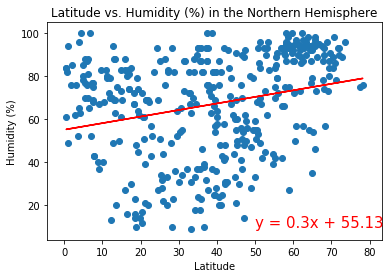

In [43]:
# call the linearregression function for Northern_lat,Northern_hum
linearregression(Northern_lat,Northern_hum,"Latitude","Humidity (%)",50,10)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13
y = 0.47x + 79.14


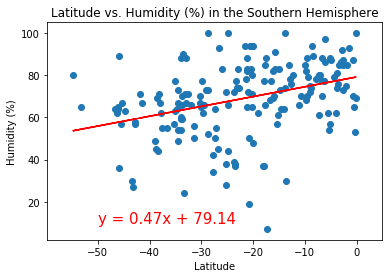

In [42]:
# call the linearregression function for Southern_lat,Southern_hum
linearregression(Southern_lat,Southern_hum,"Latitude","Humidity (%)",-50,10)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06
y = 0.47x + 26.79


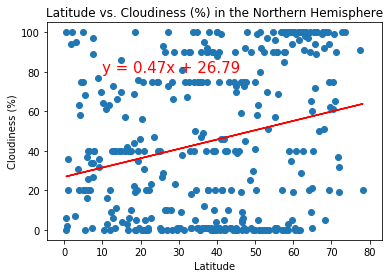

In [40]:
# call the linearregression function for Northern_lat,Northern_cloud
linearregression(Northern_lat,Northern_cloud,"Latitude","Cloudiness (%)",10,80)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.22x + 58.59


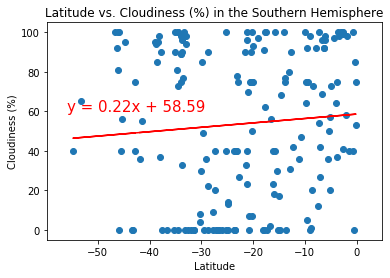

In [39]:
# call the linearregression function for Southern_lat,Southern_cloud
linearregression(Southern_lat,Southern_cloud,"Latitude","Cloudiness (%)",-56,60)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.03x + 7.32


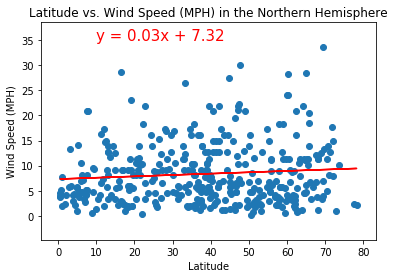

In [38]:
# call the linearregression function for Northern_lat,Northern_wind
linearregression(Northern_lat,Northern_wind,"Latitude","Wind Speed (MPH)",10,35)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11
y = -0.11x + 4.9


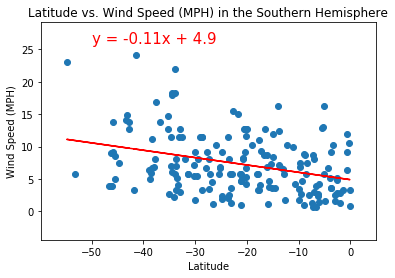

In [47]:
# call the linearregression function for Southern_lat,Southern_wind
linearregression(Southern_lat,Southern_wind,"Latitude","Wind Speed (MPH)",-50,26)